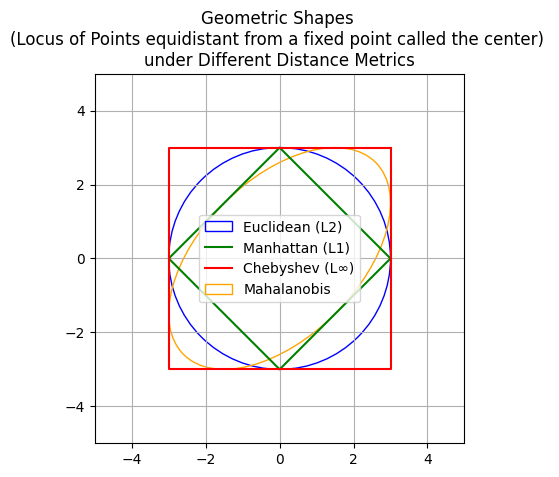

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Function to plot Euclidean Circle (L2 Norm)


def plot_euclidean(ax, center, radius):
    circle = plt.Circle(center, radius, color='b',
                        fill=False, label="Euclidean (L2)")
    ax.add_patch(circle)

# Function to plot Manhattan Diamond (L1 Norm)


def plot_manhattan(ax, center, radius):
    points = np.array(
        [[radius, 0], [0, radius], [-radius, 0], [0, -radius], [radius, 0]])
    points += center
    ax.plot(points[:, 0], points[:, 1], color='g', label="Manhattan (L1)")

# Function to plot Chebyshev Square (L∞ Norm)


def plot_chebyshev(ax, center, radius):
    points = np.array([[radius, radius], [-radius, radius],
                      [-radius, -radius], [radius, -radius], [radius, radius]])
    points += center
    ax.plot(points[:, 0], points[:, 1], color='r', label="Chebyshev (L∞)")

# Function to plot Mahalanobis Ellipse


def plot_mahalanobis(ax, center, radius, cov_matrix):
    # Calculate the ellipse parameters based on the covariance matrix
    eigvals, eigvecs = np.linalg.eigh(cov_matrix)
    angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
    width, height = 2 * radius * np.sqrt(eigvals)
    ellipse = Ellipse(center, width, height, angle=angle,
                      edgecolor='orange', fill=False)
    ellipse.set_label("Mahalanobis")
    ax.add_patch(ellipse)

# Plotting the figures


def plot_geometric_loci():
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_title(
        "Geometric Shapes \n(Locus of Points equidistant from a fixed point called the center) \nunder Different Distance Metrics")

    center = np.array([0, 0])
    radius = 3

    # Covariance matrix for Mahalanobis
    cov_matrix = np.array([[1, 0.5], [0.5, 1]])

    # Plot each distance metric
    plot_euclidean(ax, center, radius)
    plot_manhattan(ax, center, radius)
    plot_chebyshev(ax, center, radius)
    plot_mahalanobis(ax, center, radius, cov_matrix)\

    ax.legend()
    plt.grid(True)
    plt.show()


# Call the function to plot
plot_geometric_loci()

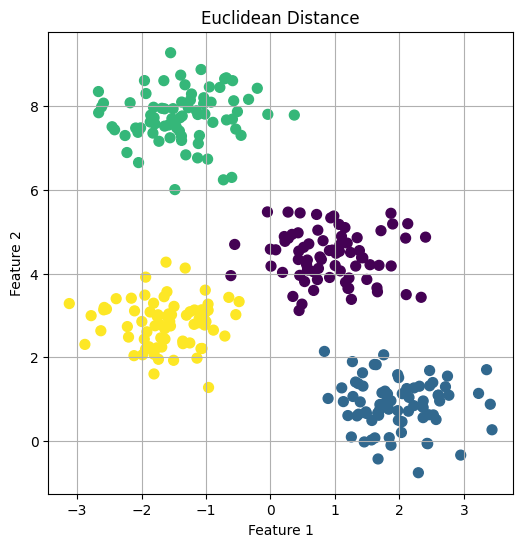

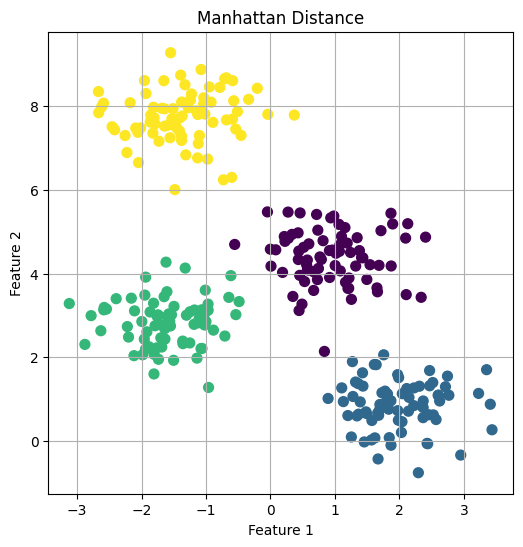

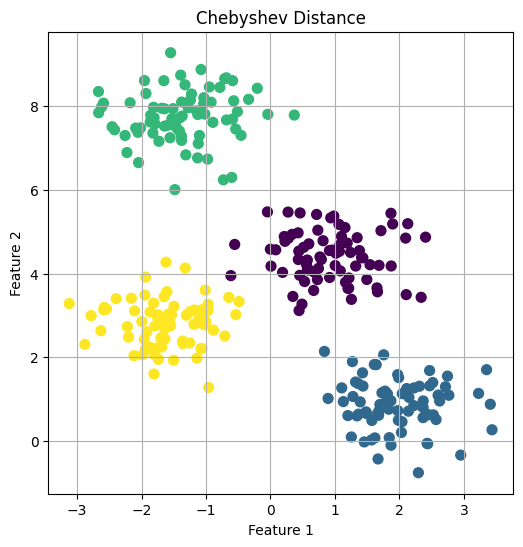

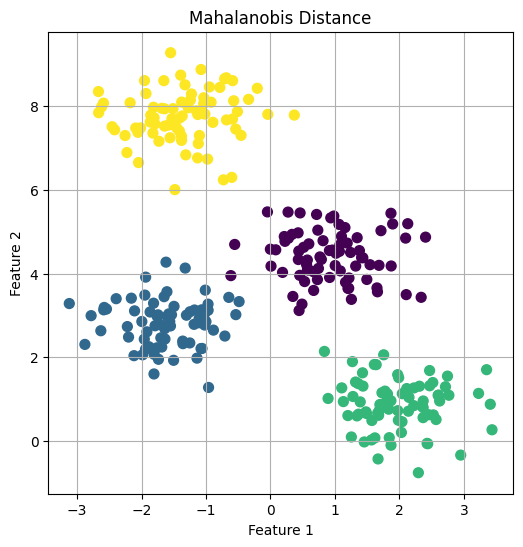

In [24]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.spatial import distance
import matplotlib.pyplot as plt

# Simulating a dataset with 4 clusters
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Function to calculate distance metrics and apply KMeans based on those distances


def custom_kmeans(X, metric=metric):
    if metric == 'mahalanobis':
        VI = np.linalg.inv(np.cov(X.T))
        dist_matrix = cdist(X, X, metric=metric, VI=VI)
    else:
        dist_matrix = cdist(X, X, metric=metric)

    # Applying KMeans using custom distance metric matrix
    kmeans = KMeans(n_clusters=4, random_state=0)
    kmeans.fit(dist_matrix)

    return kmeans


# Perform clustering using different distance metrics
metrics = ['euclidean', 'cityblock', 'chebyshev', 'mahalanobis']

results = {}
for metric in metrics:
    kmeans = custom_kmeans(X, metric=metric)
    results[metric] = kmeans.labels_

# Plot function for clusters


def plot_clusters(X, labels, title):
    plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()


# Plot results for each distance metric
metrics_titles = {
    'euclidean': 'Euclidean Distance',
    'cityblock': 'Manhattan Distance',
    'chebyshev': 'Chebyshev Distance',
    'mahalanobis': 'Mahalanobis Distance'
}

for metric, title in metrics_titles.items():
    plot_clusters(X, results[metric], title)

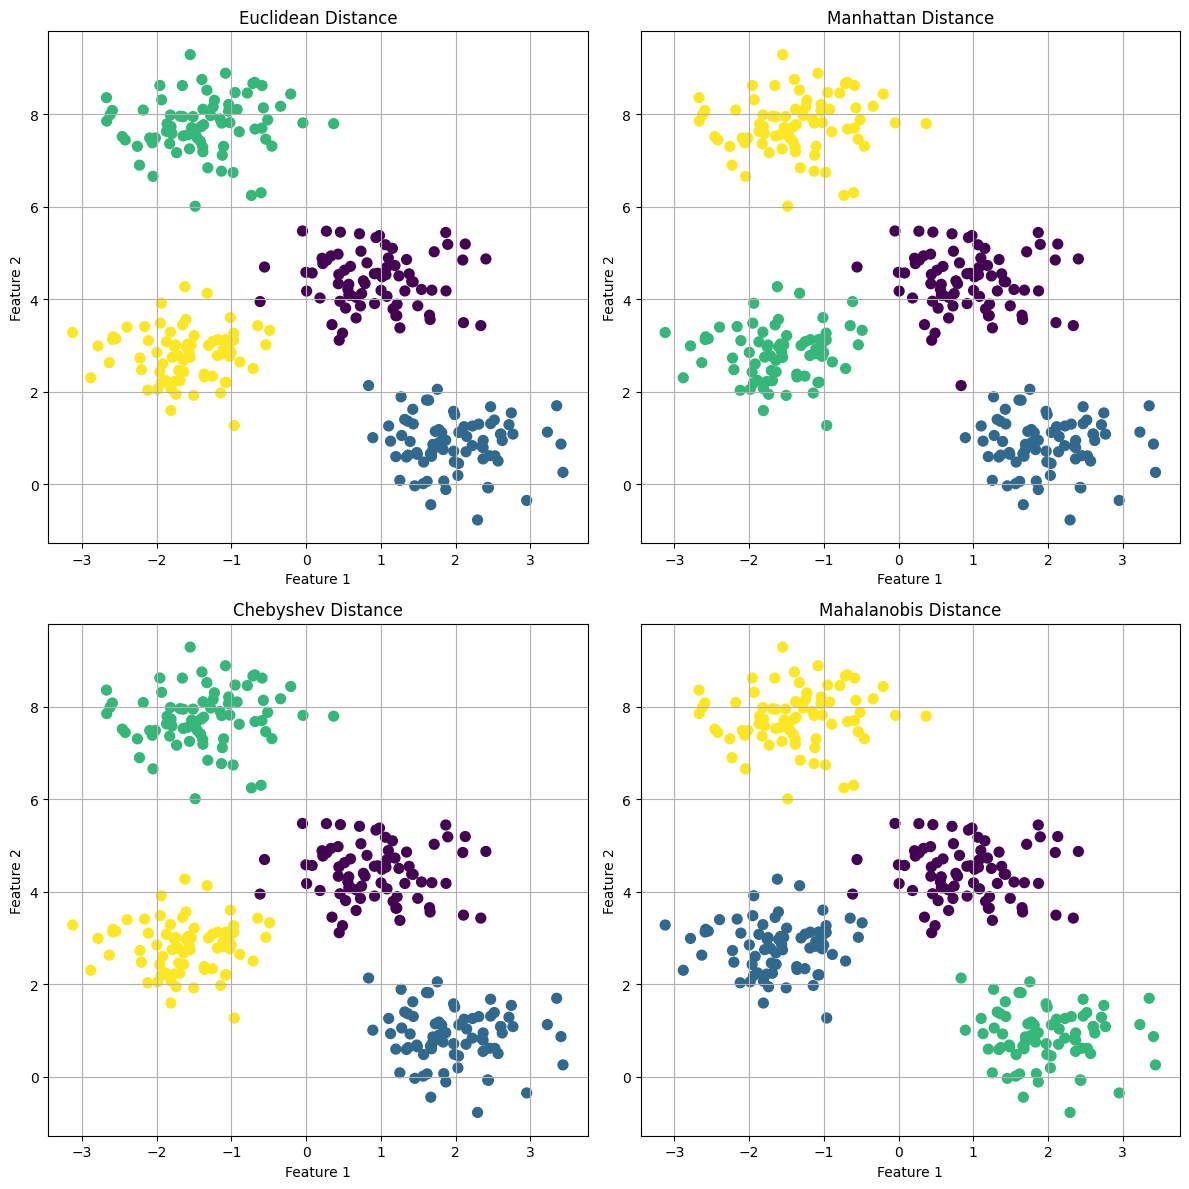

In [25]:
# Plot all clusters in one figure
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Titles for the subplots
metrics_titles = {
    'euclidean': 'Euclidean Distance',
    'cityblock': 'Manhattan Distance',
    'chebyshev': 'Chebyshev Distance',
    'mahalanobis': 'Mahalanobis Distance'
}

# Subplot locations
axes = [(0, 0), (0, 1), (1, 0), (1, 1)]

# Plot each clustering result in a different subplot
for i, (metric, title) in enumerate(metrics_titles.items()):
    ax = axs[axes[i][0], axes[i][1]]
    scatter = ax.scatter(
        X[:, 0], X[:, 1], c=results[metric], cmap='viridis', s=50)
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.grid(True)

plt.tight_layout()
plt.show()

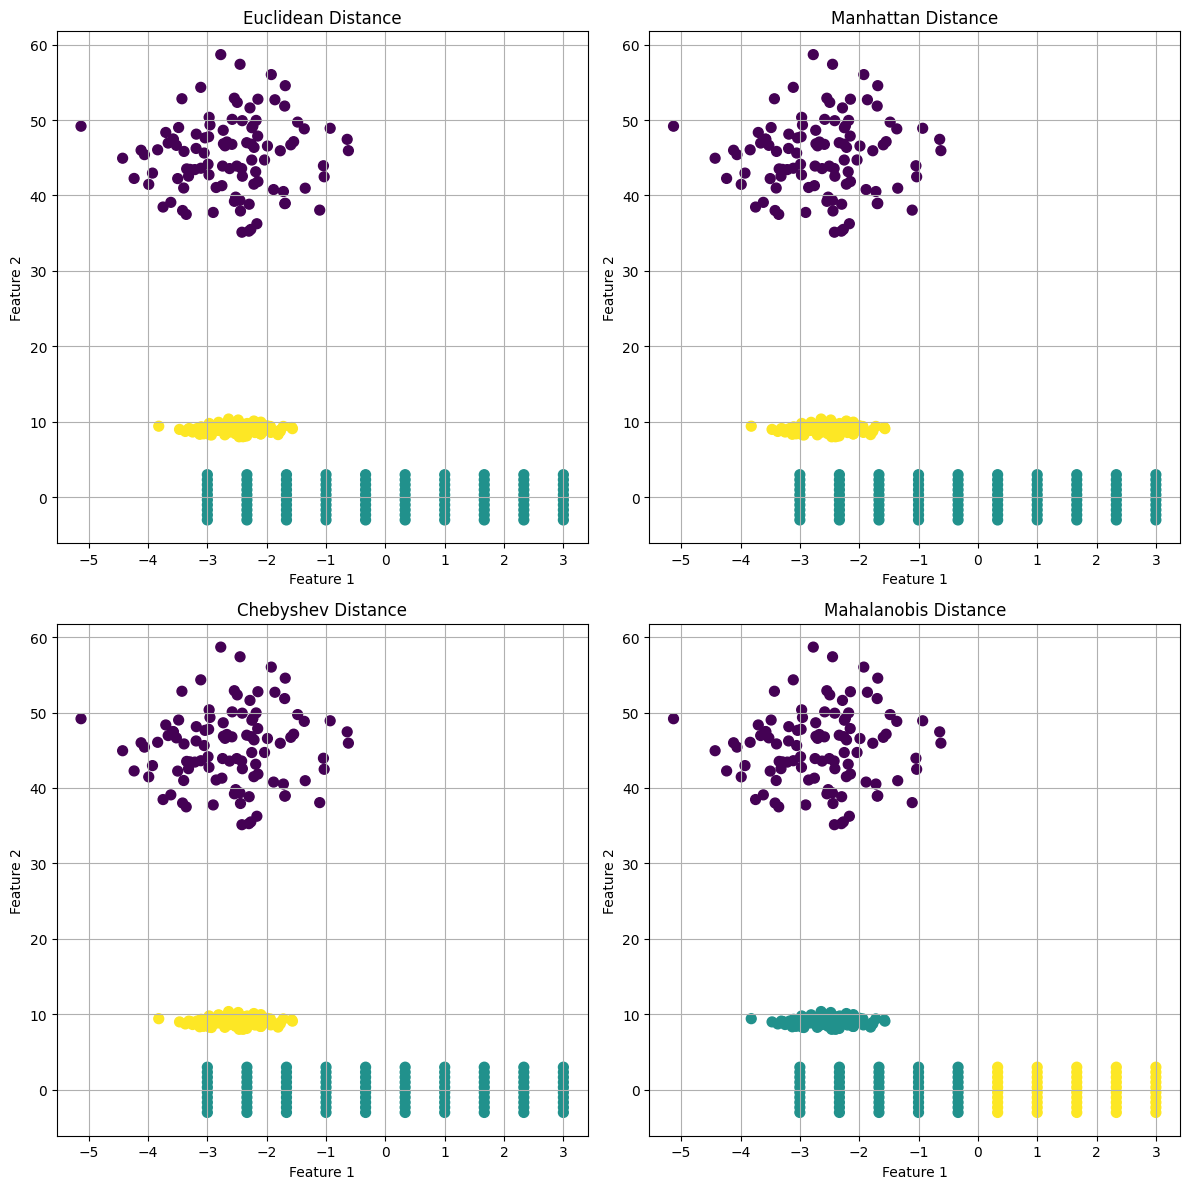

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Circular clusters using blobs
X1, y1 = make_blobs(n_samples=100, centers=1, cluster_std=0.5, random_state=42)

# Elongated clusters by stretching one dimension
X2, y2 = make_blobs(n_samples=100, centers=1, cluster_std=1, random_state=42)
X2[:, 1] *= 5  # Stretch the second dimension to make an elongated shape

# Square-shaped cluster by placing points in a grid
grid_x = np.linspace(-3, 3, 10)
grid_y = np.linspace(-3, 3, 10)
X3 = np.array([[x, y] for x in grid_x for y in grid_y])
y3 = np.zeros(X3.shape[0])

# Combine the datasets into one
X_combined = np.vstack([X1, X2, X3])
y_combined = np.hstack([y1, y2, y3])

# Function to calculate distance metrics and apply KMeans based on those distances


def custom_kmeans(X, metric=metric):
    if metric == 'mahalanobis':
        VI = np.linalg.inv(np.cov(X.T))
        dist_matrix = cdist(X, X, metric=metric, VI=VI)
    else:
        dist_matrix = cdist(X, X, metric=metric)

    # Applying KMeans using custom distance metric matrix
    kmeans = KMeans(n_clusters=3, random_state=0)
    kmeans.fit(dist_matrix)

    return kmeans


# Perform clustering using different distance metrics
metrics = ['euclidean', 'cityblock', 'chebyshev', 'mahalanobis']
results = {}

for metric in metrics:
    kmeans = custom_kmeans(X_combined, metric=metric)
    results[metric] = kmeans.labels_

# Plot all clusters in one figure
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Titles for the subplots
metrics_titles = {
    'euclidean': 'Euclidean Distance',
    'cityblock': 'Manhattan Distance',
    'chebyshev': 'Chebyshev Distance',
    'mahalanobis': 'Mahalanobis Distance'
}

# Subplot locations
axes = [(0, 0), (0, 1), (1, 0), (1, 1)]

# Plot each clustering result in a different subplot
for i, (metric, title) in enumerate(metrics_titles.items()):
    ax = axs[axes[i][0], axes[i][1]]
    scatter = ax.scatter(
        X_combined[:, 0], X_combined[:, 1], c=results[metric], cmap='viridis', s=50)
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.grid(True)

plt.tight_layout()
plt.show()

c:\Users\stefa\anaconda3\envs\pyimage\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


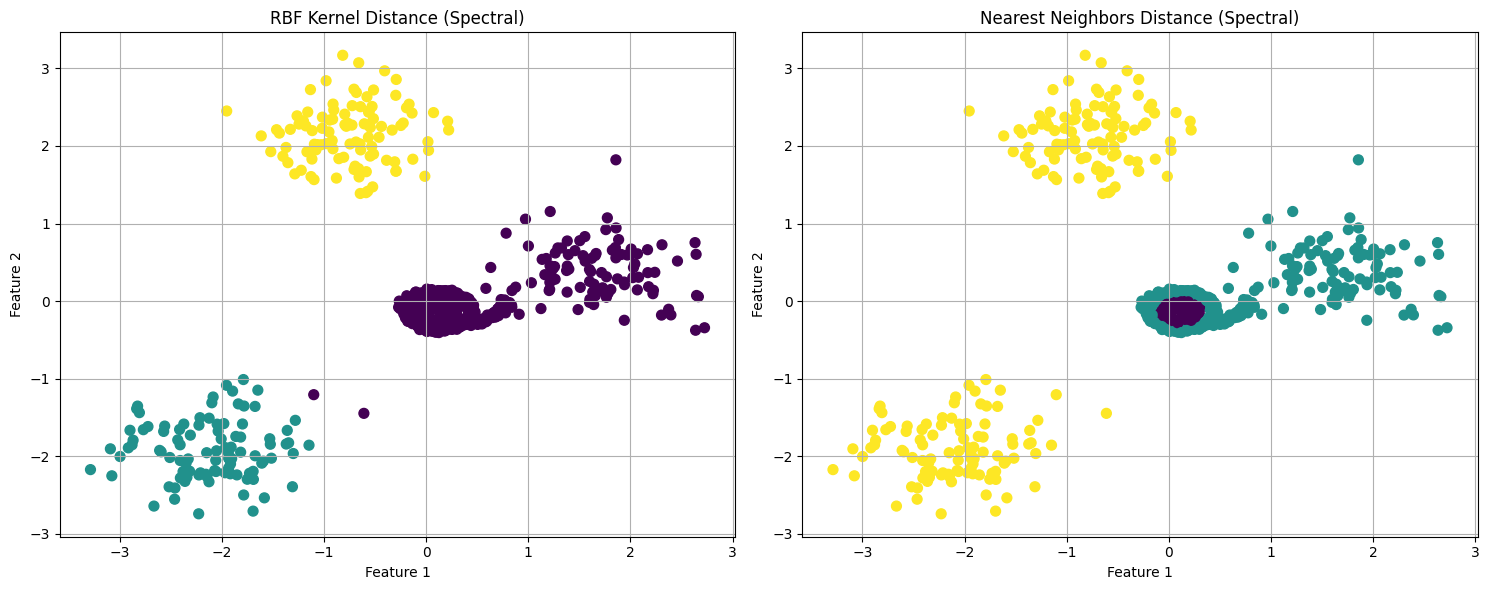

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler

# Generate more complex, irregular clusters
X1, _ = make_moons(n_samples=300, noise=0.1)  # Moon-shaped clusters
X2, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.5,
                   random_state=42)  # Irregular blobs
X3, _ = make_circles(n_samples=300, factor=0.5,
                     noise=0.05)  # Concentric circles

# Combine the datasets to increase complexity
X_combined = np.vstack([X1, X2, X3])

# Standardize the dataset
X_combined = StandardScaler().fit_transform(X_combined)

# Custom Spectral Clustering with different distance metrics


def custom_spectral(X, metric='rbf'):
    # Apply Spectral Clustering
    clustering = SpectralClustering(
        n_clusters=3, affinity=metric, random_state=42)
    labels = clustering.fit_predict(X)
    return labels


# Define different affinity metrics (distance measures for clustering)
metrics = ['rbf', 'nearest_neighbors', 'precomputed']

# Perform Spectral Clustering with different distance metrics
results = {}
for metric in metrics:
    if metric == 'precomputed':
        continue  # Skipping 'precomputed' because we don't have a precomputed matrix
    labels = custom_spectral(X_combined, metric=metric)
    results[metric] = labels

# Plot the clustering results for each metric
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Titles for the plots
titles = {
    'rbf': 'RBF Kernel Distance (Spectral)',
    'nearest_neighbors': 'Nearest Neighbors Distance (Spectral)',
}

# Plot each result
for i, metric in enumerate(['rbf', 'nearest_neighbors']):
    ax = axs[i]
    scatter = ax.scatter(
        X_combined[:, 0], X_combined[:, 1], c=results[metric], cmap='viridis', s=50)
    ax.set_title(titles[metric])
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.grid(True)

plt.tight_layout()
plt.show()

c:\Users\stefa\anaconda3\envs\pyimage\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


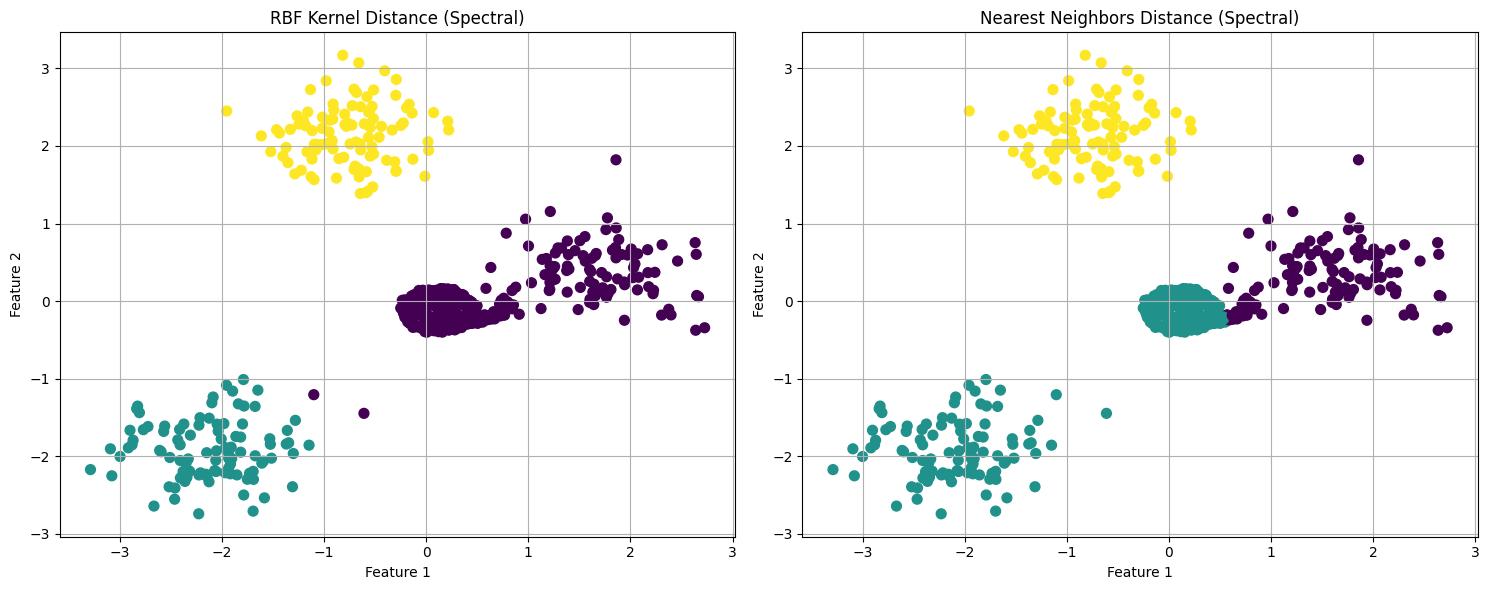

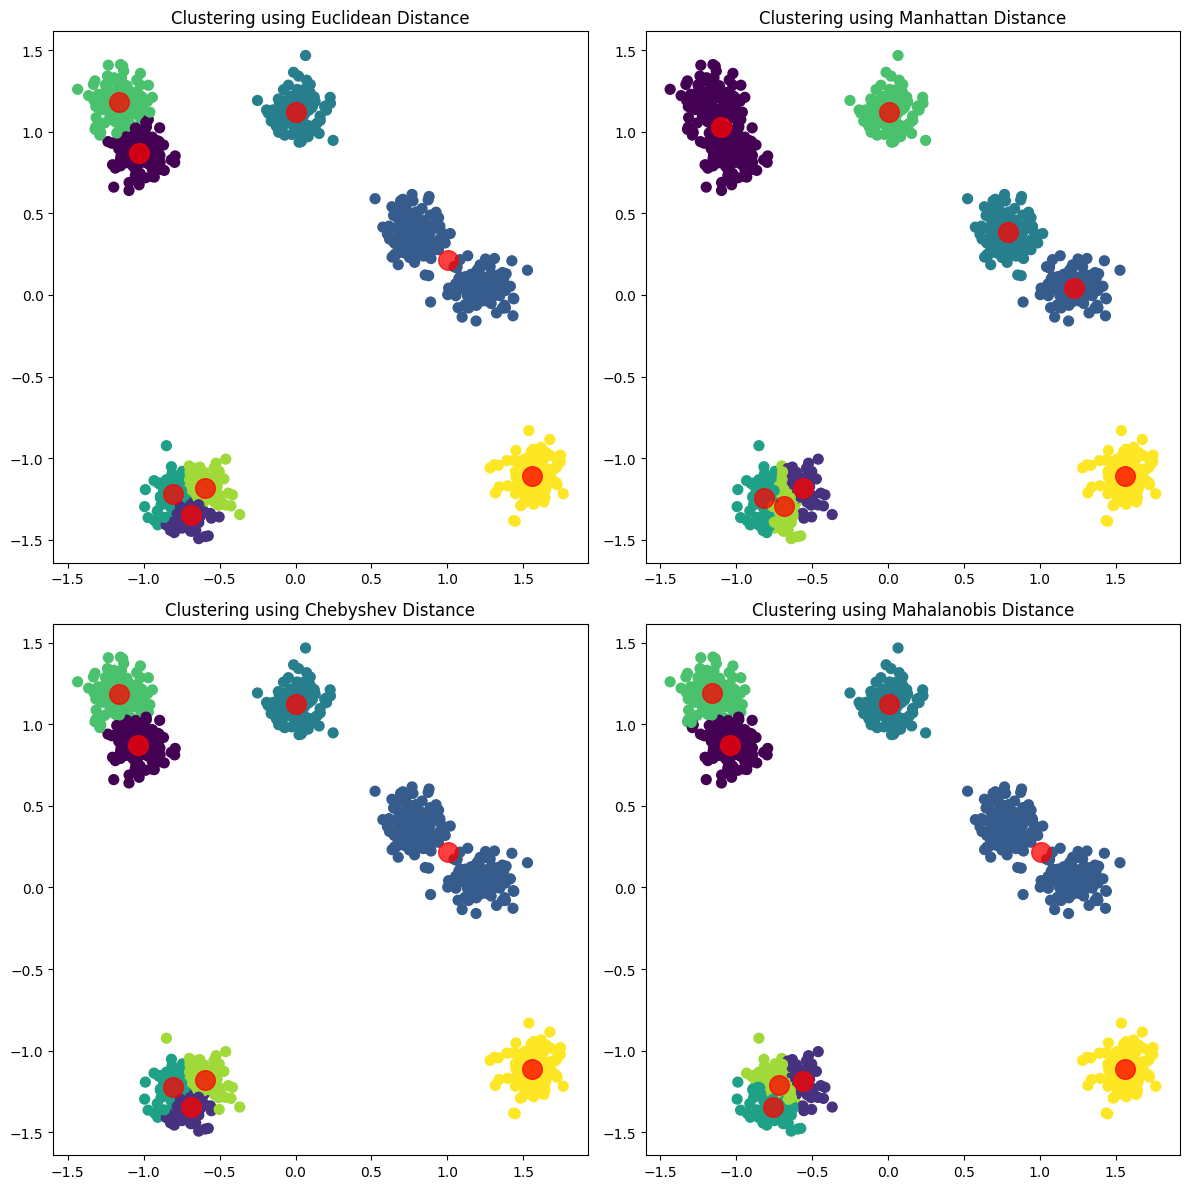

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

# 1. Generate synthetic dataset
n_samples = 1000
n_clusters = 8
X, y_true = make_blobs(n_samples=n_samples,
                       centers=n_clusters, cluster_std=0.6, random_state=42)
scaler = StandardScaler()
# Scale the dataset for Mahalanobis distance
X_scaled = scaler.fit_transform(X)

# 2. Define distance metrics functions

# Euclidean distance


def euclidean_distance(X, centroids):
    return cdist(X, centroids, metric='euclidean')

# Manhattan distance


def manhattan_distance(X, centroids):
    return cdist(X, centroids, metric='cityblock')

# Chebyshev distance


def chebyshev_distance(X, centroids):
    return cdist(X, centroids, metric='chebyshev')

# Mahalanobis distance


def mahalanobis_distance(X, centroids):
    VI = np.linalg.inv(np.cov(X.T))
    return cdist(X, centroids, metric='mahalanobis', VI=VI)

# 3. Custom KMeans clustering function


def custom_kmeans(X, n_clusters, distance_metric, max_iter=300):
    # Randomly initialize centroids
    np.random.seed(42)
    centroids = X[np.random.choice(range(len(X)), n_clusters, replace=False)]

    for _ in range(max_iter):
        # Compute distance from points to centroids
        distances = distance_metric(X, centroids)

        # Assign clusters based on minimum distance
        labels = np.argmin(distances, axis=1)

        # Calculate new centroids
        new_centroids = np.array([X[labels == i].mean(axis=0)
                                 for i in range(n_clusters)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids


# 4. Apply KMeans with different distance metrics
metrics = {
    "Euclidean": euclidean_distance,
    "Manhattan": manhattan_distance,
    "Chebyshev": chebyshev_distance,
    "Mahalanobis": mahalanobis_distance
}

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for ax, (metric_name, metric_func) in zip(axes.flatten(), metrics.items()):
    labels, centroids = custom_kmeans(X_scaled, n_clusters, metric_func)

    # Plot the clusters
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, s=50, cmap='viridis')
    ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75)
    ax.set_title(f'Clustering using {metric_name} Distance')

plt.tight_layout()
plt.show()

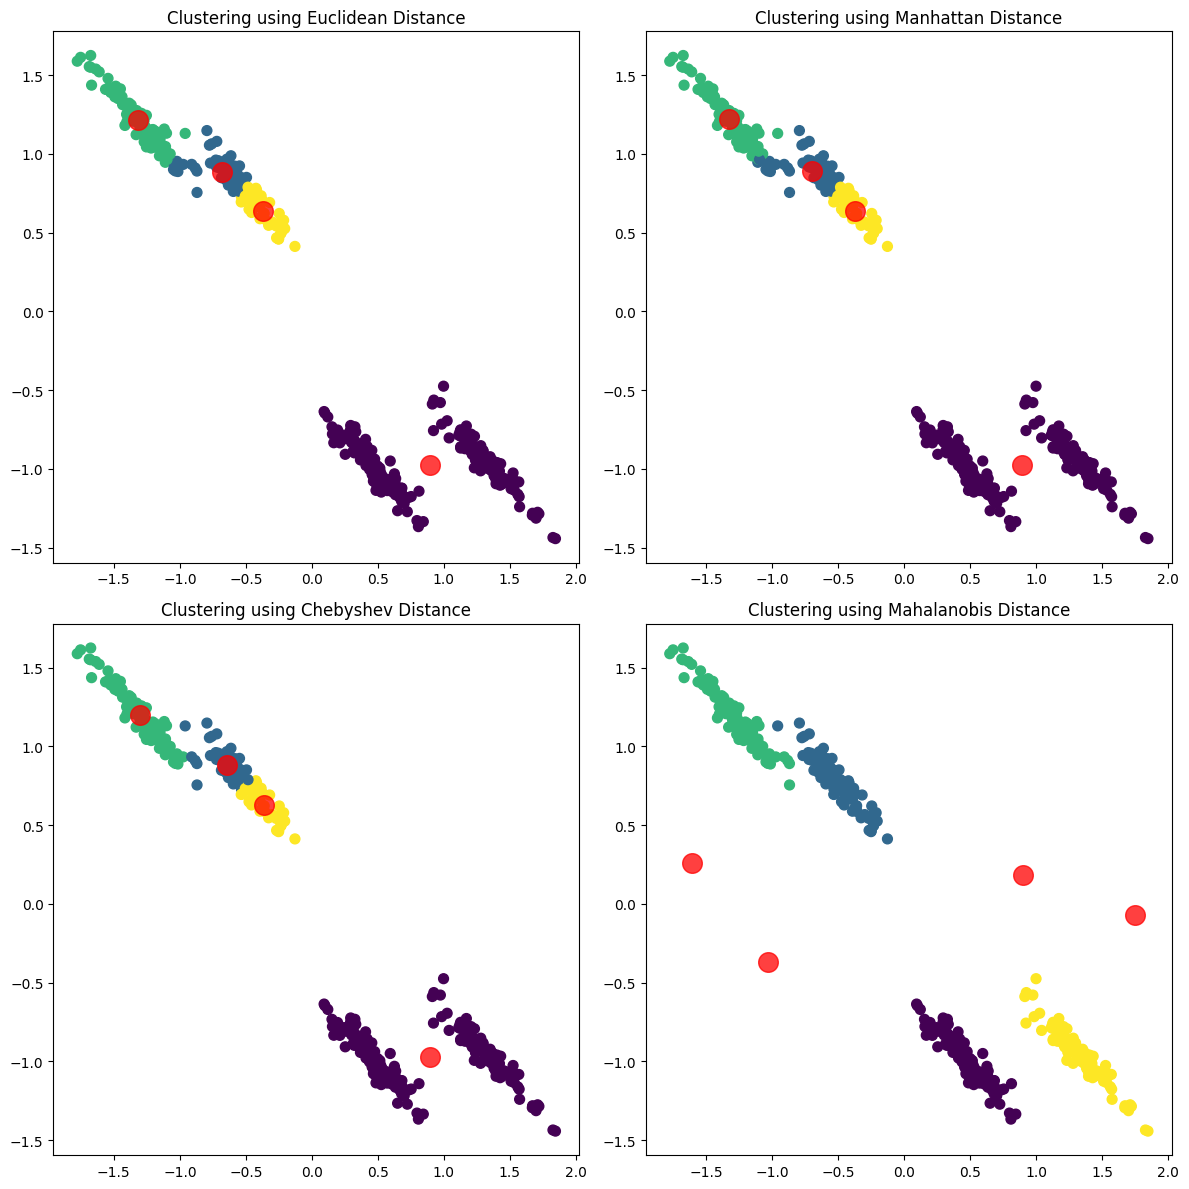

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

# 1. Generate an anisotropic synthetic dataset
n_samples = 400
n_clusters = 4
X, y_true = make_blobs(n_samples=n_samples,
                       centers=n_clusters, cluster_std=1, random_state=42)

# Apply transformation to make the dataset anisotropic (elongated and skewed)
transformation = np.array([[0.6, -0.6], [-0.4, 0.8]])
X_aniso = np.dot(X, transformation)

# Scale the dataset for Mahalanobis distance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_aniso)

# Perform PCA to introduce correlations in the dataset (for Mahalanobis)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 2. Define distance metrics functions

# Euclidean distance


def euclidean_distance(X, centroids):
    return cdist(X, centroids, metric='euclidean')

# Manhattan distance


def manhattan_distance(X, centroids):
    return cdist(X, centroids, metric='cityblock')

# Chebyshev distance


def chebyshev_distance(X, centroids):
    return cdist(X, centroids, metric='chebyshev')

# Mahalanobis distance


def mahalanobis_distance(X, centroids):
    VI = np.linalg.inv(np.cov(X.T))  # Inverse of the covariance matrix
    return cdist(X, centroids, metric='mahalanobis', VI=VI)

# 3. Custom KMeans clustering function


def custom_kmeans(X, n_clusters, distance_metric, max_iter=300):
    # Randomly initialize centroids
    np.random.seed(42)
    centroids = X[np.random.choice(range(len(X)), n_clusters, replace=False)]

    for _ in range(max_iter):
        # Compute distance from points to centroids
        distances = distance_metric(X, centroids)

        # Assign clusters based on minimum distance
        labels = np.argmin(distances, axis=1)

        # Calculate new centroids
        new_centroids = np.array([X[labels == i].mean(axis=0)
                                 for i in range(n_clusters)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids


# 4. Apply KMeans with different distance metrics
metrics = {
    "Euclidean": euclidean_distance,
    "Manhattan": manhattan_distance,
    "Chebyshev": chebyshev_distance,
    "Mahalanobis": mahalanobis_distance
}

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for ax, (metric_name, metric_func) in zip(axes.flatten(), metrics.items()):
    labels, centroids = custom_kmeans(
        X_pca if metric_name == "Mahalanobis" else X_scaled, n_clusters, metric_func)

    # Plot the clusters
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, s=50, cmap='viridis')
    ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75)
    ax.set_title(f'Clustering using {metric_name} Distance')

plt.tight_layout()
plt.show()

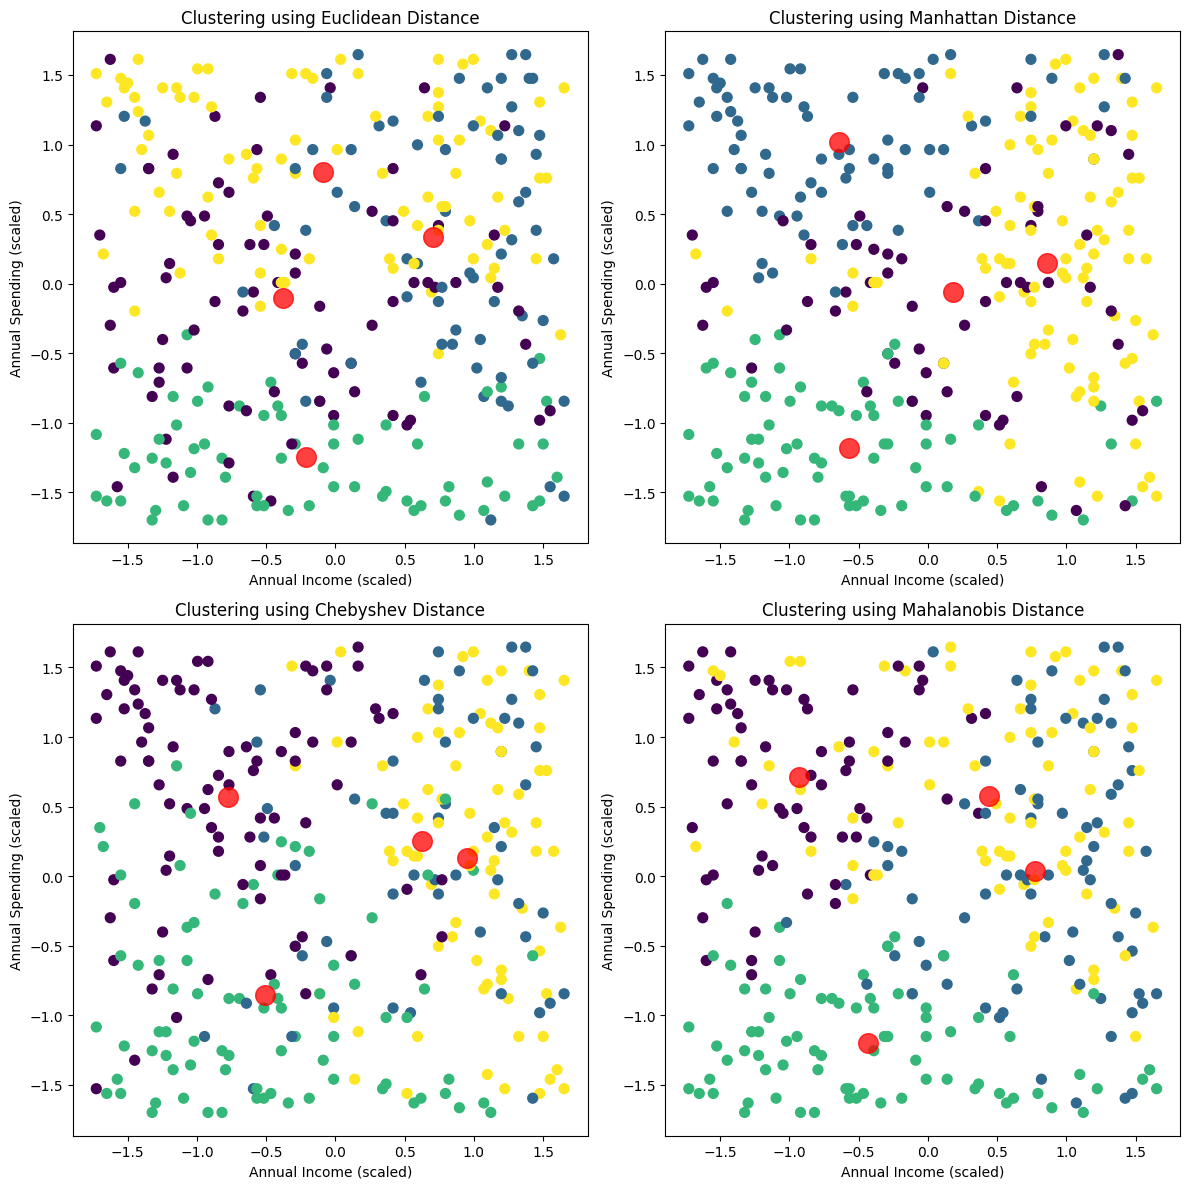

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

# 1. Simulate customer behavior data
np.random.seed(42)
n_customers = 300

# Random age between 18 and 70
age = np.random.randint(18, 70, size=n_customers)
# Random annual income between 15k and 150k
annual_income = np.random.randint(15, 150, size=n_customers)
# Random spending between 1k and 100k
annual_spending = np.random.randint(1, 100, size=n_customers)
# Random spending score between 1 and 100
spending_score = np.random.randint(1, 100, size=n_customers)

# Create a DataFrame to hold the customer data
data = pd.DataFrame({
    'Age': age,
    'Annual Income': annual_income,
    'Annual Spending': annual_spending,
    'Spending Score': spending_score
})

# Standardize the data for better clustering performance
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 2. Define distance metrics functions

# Euclidean distance
def euclidean_distance(X, centroids):
    return cdist(X, centroids, metric='euclidean')

# Manhattan distance
def manhattan_distance(X, centroids):
    return cdist(X, centroids, metric='cityblock')

# Chebyshev distance
def chebyshev_distance(X, centroids):
    return cdist(X, centroids, metric='chebyshev')

# Mahalanobis distance
def mahalanobis_distance(X, centroids):
    VI = np.linalg.inv(np.cov(X.T))  # Inverse of covariance matrix
    return cdist(X, centroids, metric='mahalanobis', VI=VI)

# 3. Custom KMeans clustering function
def custom_kmeans(X, n_clusters, distance_metric, max_iter=300):
    # Randomly initialize centroids
    np.random.seed(42)
    centroids = X[np.random.choice(range(len(X)), n_clusters, replace=False)]

    for _ in range(max_iter):
        # Compute distance from points to centroids
        distances = distance_metric(X, centroids)

        # Assign clusters based on minimum distance
        labels = np.argmin(distances, axis=1)

        # Calculate new centroids
        new_centroids = np.array([X[labels == i].mean(axis=0)
                                 for i in range(n_clusters)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids


# 4. Apply KMeans with different distance metrics
n_clusters = 4
metrics = {
    "Euclidean": euclidean_distance,
    "Manhattan": manhattan_distance,
    "Chebyshev": chebyshev_distance,
    "Mahalanobis": mahalanobis_distance
}

# Create plots for each distance metric
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for ax, (metric_name, metric_func) in zip(axes.flatten(), metrics.items()):
    labels, centroids = custom_kmeans(data_scaled, n_clusters, metric_func)

    # Plot clusters (for simplicity, use only two features for visualization)
    ax.scatter(data_scaled[:, 1], data_scaled[:, 2],
               c=labels, s=50, cmap='viridis')
    ax.scatter(centroids[:, 1], centroids[:, 2], c='red', s=200, alpha=0.75)
    ax.set_title(f'Clustering using {metric_name} Distance')
    ax.set_xlabel('Annual Income (scaled)')
    ax.set_ylabel('Annual Spending (scaled)')

plt.tight_layout()
plt.show()

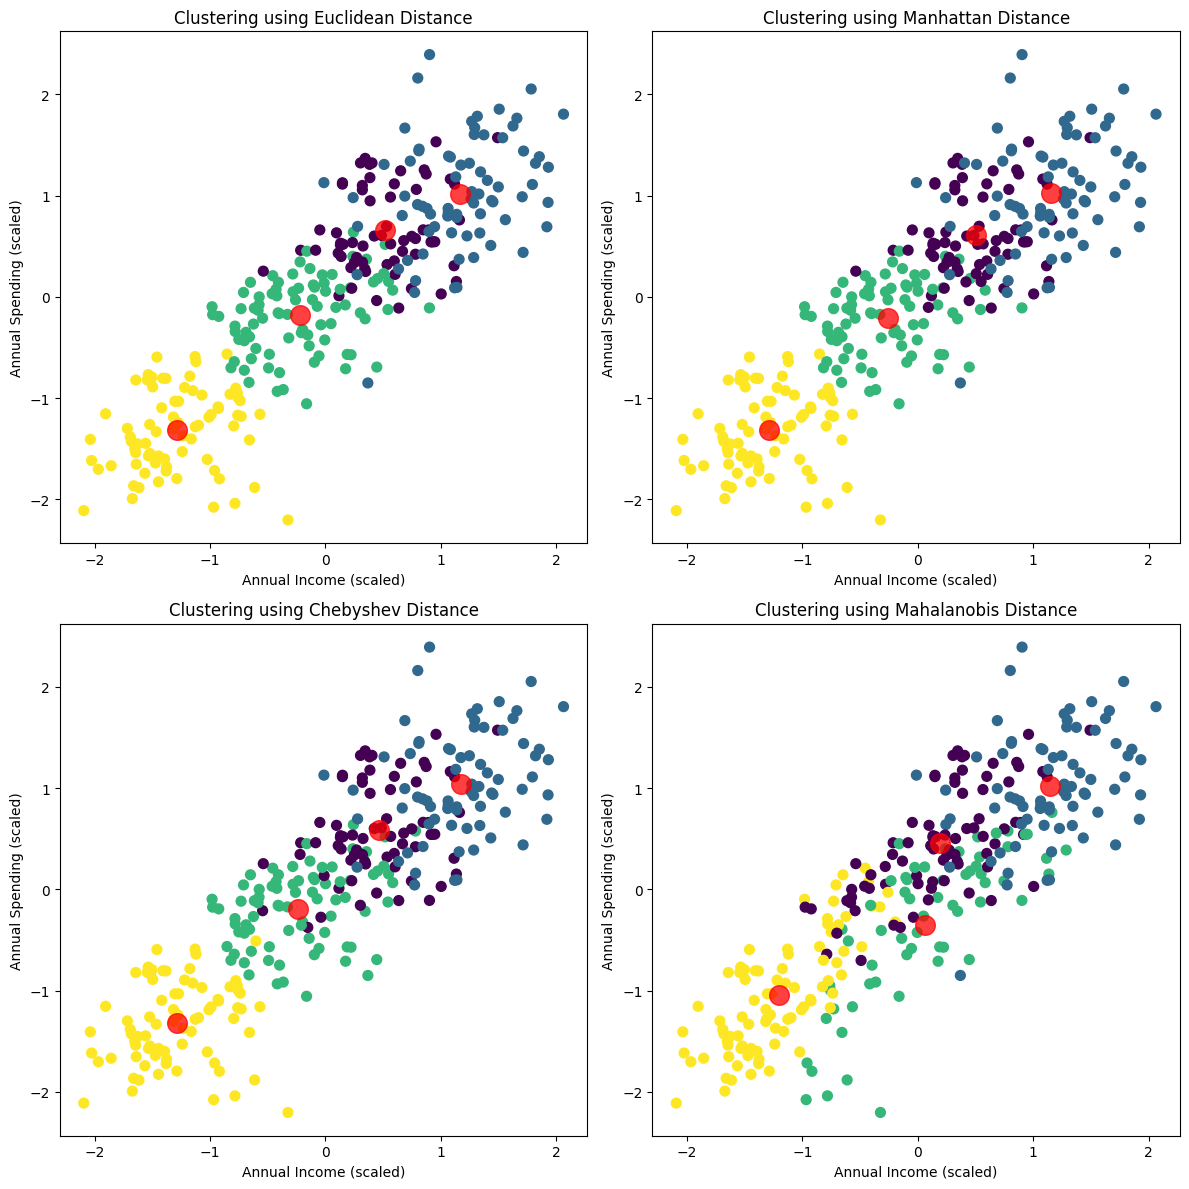

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

# 1. Simulate correlated customer data using multivariate normal distribution
np.random.seed(42)
n_customers = 300

# Define means and covariances for each customer segment (cluster)
# Young, low-income, low-spending, moderate score
mean_cluster_1 = [25, 35, 25, 60]
# Middle-aged, middle-income, medium spending, high score
mean_cluster_2 = [35, 70, 55, 75]
# Older, high-income, high-spending, high score
mean_cluster_3 = [50, 100, 80, 90]
# Senior, very high-income, high-spending, low score
mean_cluster_4 = [60, 120, 90, 50]

covariance = [[30, 50, 40, 20],    # Correlation between features
              [50, 300, 100, 30],
              [40, 100, 200, 40],
              [20, 30, 40, 100]]

# Generate data for each segment
data_cluster_1 = np.random.multivariate_normal(mean_cluster_1, covariance, n_customers // 4)
data_cluster_2 = np.random.multivariate_normal(mean_cluster_2, covariance, n_customers // 4)
data_cluster_3 = np.random.multivariate_normal(mean_cluster_3, covariance, n_customers // 4)
data_cluster_4 = np.random.multivariate_normal(mean_cluster_4, covariance, n_customers // 4)

# Combine the data to form the complete dataset
data = np.vstack((data_cluster_1, data_cluster_2,
                 data_cluster_3, data_cluster_4))

# Create a DataFrame for easier manipulation
df = pd.DataFrame(
    data, columns=['Age', 'Annual Income', 'Annual Spending', 'Spending Score'])

# Standardize the data for better clustering performance
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# 2. Define distance metrics functions

# Euclidean distance


def euclidean_distance(X, centroids):
    return cdist(X, centroids, metric='euclidean')

# Manhattan distance


def manhattan_distance(X, centroids):
    return cdist(X, centroids, metric='cityblock')

# Chebyshev distance


def chebyshev_distance(X, centroids):
    return cdist(X, centroids, metric='chebyshev')

# Mahalanobis distance


def mahalanobis_distance(X, centroids):
    VI = np.linalg.inv(np.cov(X.T))  # Inverse of covariance matrix
    return cdist(X, centroids, metric='mahalanobis', VI=VI)

# 3. Custom KMeans clustering function


def custom_kmeans(X, n_clusters, distance_metric, max_iter=300):
    # Randomly initialize centroids
    np.random.seed(42)
    centroids = X[np.random.choice(range(len(X)), n_clusters, replace=False)]

    for _ in range(max_iter):
        # Compute distance from points to centroids
        distances = distance_metric(X, centroids)

        # Assign clusters based on minimum distance
        labels = np.argmin(distances, axis=1)

        # Calculate new centroids
        new_centroids = np.array([X[labels == i].mean(axis=0)
                                 for i in range(n_clusters)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids


# 4. Apply KMeans with different distance metrics
n_clusters = 4
metrics = {
    "Euclidean": euclidean_distance,
    "Manhattan": manhattan_distance,
    "Chebyshev": chebyshev_distance,
    "Mahalanobis": mahalanobis_distance
}

# Create plots for each distance metric
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for ax, (metric_name, metric_func) in zip(axes.flatten(), metrics.items()):
    labels, centroids = custom_kmeans(data_scaled, n_clusters, metric_func)

    # Plot clusters (for simplicity, use only two features for visualization)
    ax.scatter(data_scaled[:, 1], data_scaled[:, 2],
               c=labels, s=50, cmap='viridis')
    ax.scatter(centroids[:, 1], centroids[:, 2], c='red', s=200, alpha=0.75)
    ax.set_title(f'Clustering using {metric_name} Distance')
    ax.set_xlabel('Annual Income (scaled)')
    ax.set_ylabel('Annual Spending (scaled)')

plt.tight_layout()
plt.show()

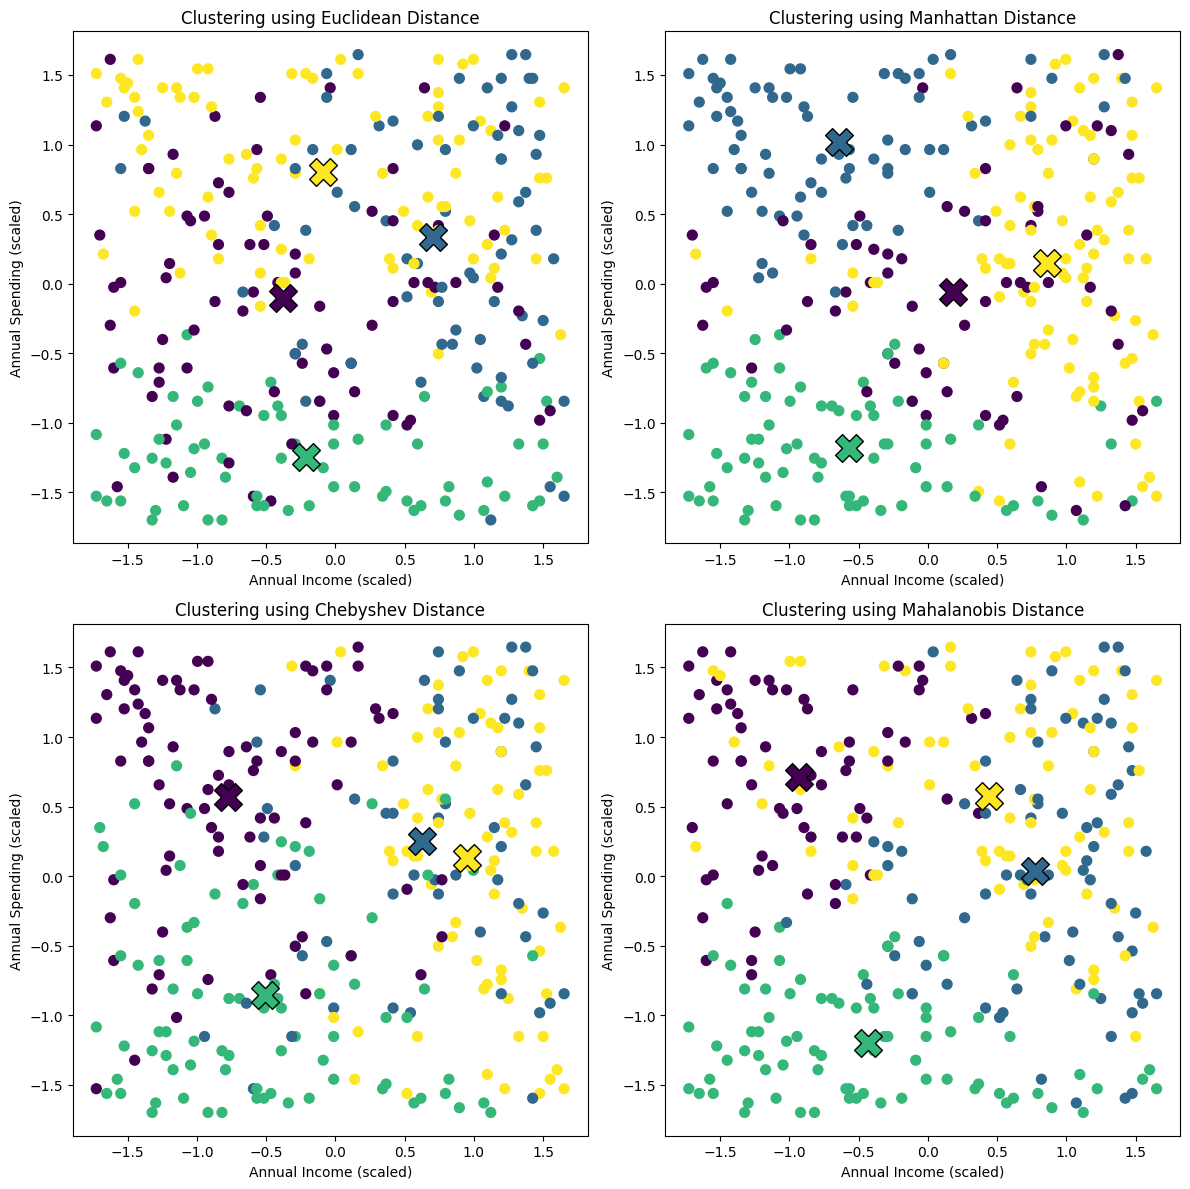

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

# 1. Simulate customer behavior data
np.random.seed(42)
n_customers = 300

# Random age between 18 and 70
age = np.random.randint(18, 70, size=n_customers)
# Random annual income between 15k and 150k
annual_income = np.random.randint(15, 150, size=n_customers)
# Random spending between 1k and 100k
annual_spending = np.random.randint(1, 100, size=n_customers)
# Random spending score between 1 and 100
spending_score = np.random.randint(1, 100, size=n_customers)

# Create a DataFrame to hold the customer data
data = pd.DataFrame({
    'Age': age,
    'Annual Income': annual_income,
    'Annual Spending': annual_spending,
    'Spending Score': spending_score
})

# Standardize the data for better clustering performance
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 2. Define distance metrics functions

# Euclidean distance


def euclidean_distance(X, centroids):
    return cdist(X, centroids, metric='euclidean')

# Manhattan distance


def manhattan_distance(X, centroids):
    return cdist(X, centroids, metric='cityblock')

# Chebyshev distance


def chebyshev_distance(X, centroids):
    return cdist(X, centroids, metric='chebyshev')

# Mahalanobis distance


def mahalanobis_distance(X, centroids):
    VI = np.linalg.inv(np.cov(X.T))  # Inverse of covariance matrix
    return cdist(X, centroids, metric='mahalanobis', VI=VI)

# 3. Custom KMeans clustering function


def custom_kmeans(X, n_clusters, distance_metric, max_iter=300):
    # Randomly initialize centroids
    np.random.seed(42)
    centroids = X[np.random.choice(range(len(X)), n_clusters, replace=False)]

    for _ in range(max_iter):
        # Compute distance from points to centroids
        distances = distance_metric(X, centroids)

        # Assign clusters based on minimum distance
        labels = np.argmin(distances, axis=1)

        # Calculate new centroids
        new_centroids = np.array([X[labels == i].mean(axis=0)
                                 for i in range(n_clusters)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids


# 4. Apply KMeans with different distance metrics
n_clusters = 4
metrics = {
    "Euclidean": euclidean_distance,
    "Manhattan": manhattan_distance,
    "Chebyshev": chebyshev_distance,
    "Mahalanobis": mahalanobis_distance
}

# Create plots for each distance metric
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for ax, (metric_name, metric_func) in zip(axes.flatten(), metrics.items()):
    labels, centroids = custom_kmeans(data_scaled, n_clusters, metric_func)

    # Scatter the clusters and centroids using the same color for each cluster and its centroid
    scatter = ax.scatter(
        data_scaled[:, 1], data_scaled[:, 2], c=labels, s=50, cmap='viridis')
    for i in range(n_clusters):
        ax.scatter(centroids[i, 1], centroids[i, 2], c=[scatter.to_rgba(
            i)], s=400, edgecolor='black', marker='X', label=f'Centroid {i}')

    ax.set_title(f'Clustering using {metric_name} Distance')
    ax.set_xlabel('Annual Income (scaled)')
    ax.set_ylabel('Annual Spending (scaled)')

plt.tight_layout()
plt.show()

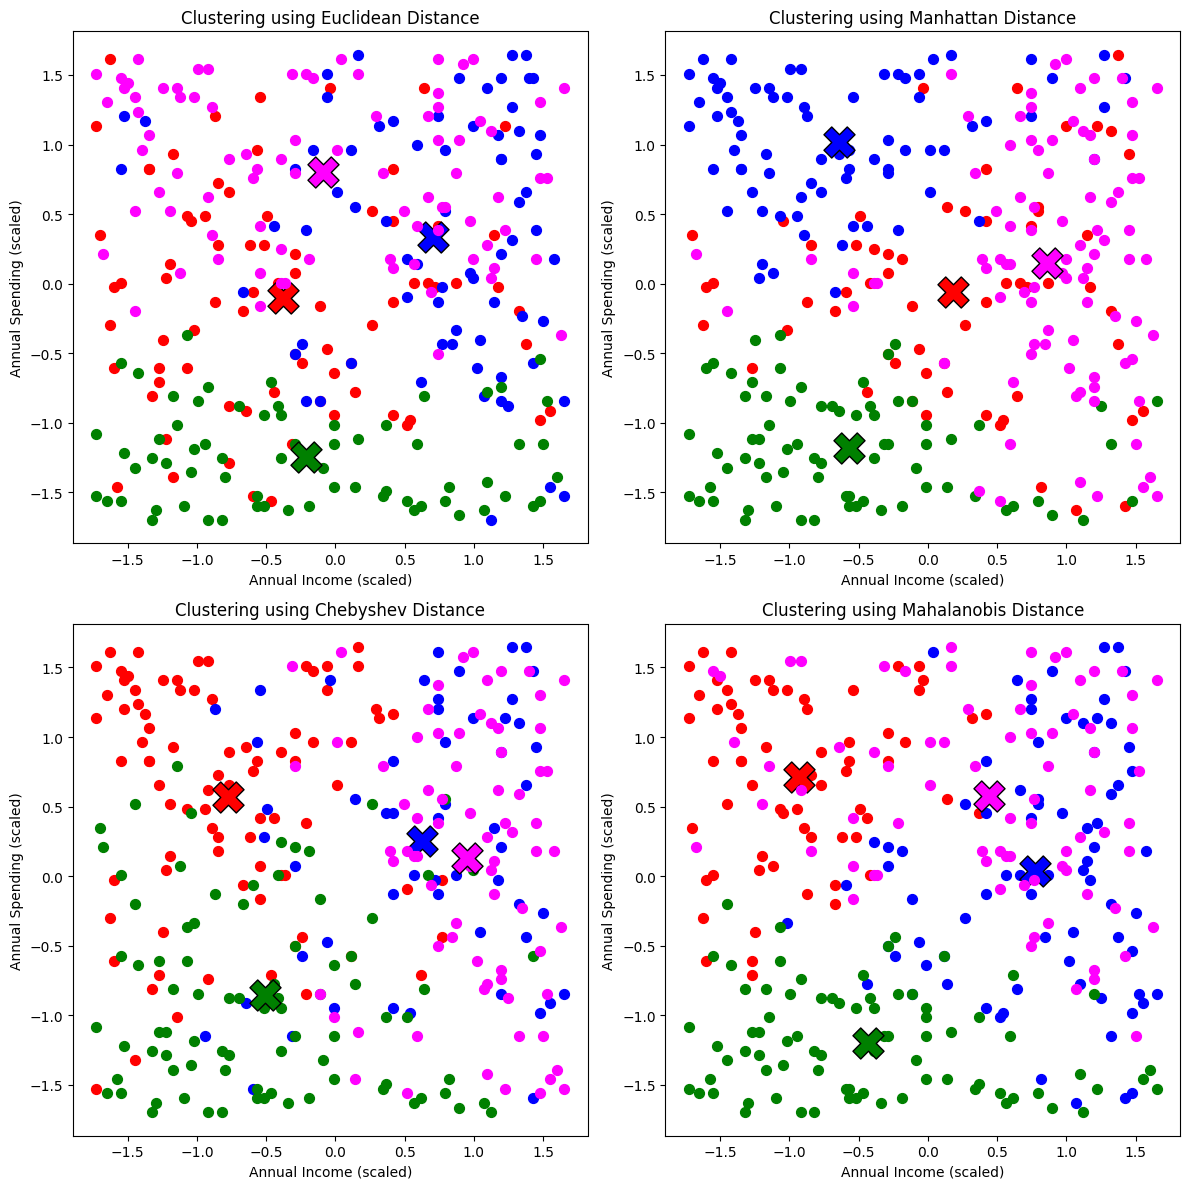

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from matplotlib import colors as mcolors

# 1. Simulate customer behavior data
np.random.seed(42)
n_customers = 300

# Random age between 18 and 70
age = np.random.randint(18, 70, size=n_customers)
# Random annual income between 15k and 150k
annual_income = np.random.randint(15, 150, size=n_customers)
# Random spending between 1k and 100k
annual_spending = np.random.randint(1, 100, size=n_customers)
# Random spending score between 1 and 100
spending_score = np.random.randint(1, 100, size=n_customers)

# Create a DataFrame to hold the customer data
data = pd.DataFrame({
    'Age': age,
    'Annual Income': annual_income,
    'Annual Spending': annual_spending,
    'Spending Score': spending_score
})

# Standardize the data for better clustering performance
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 2. Define distance metrics functions

# Euclidean distance


def euclidean_distance(X, centroids):
    return cdist(X, centroids, metric='euclidean')

# Manhattan distance


def manhattan_distance(X, centroids):
    return cdist(X, centroids, metric='cityblock')

# Chebyshev distance


def chebyshev_distance(X, centroids):
    return cdist(X, centroids, metric='chebyshev')

# Mahalanobis distance


def mahalanobis_distance(X, centroids):
    VI = np.linalg.inv(np.cov(X.T))  # Inverse of covariance matrix
    return cdist(X, centroids, metric='mahalanobis', VI=VI)

# 3. Custom KMeans clustering function


def custom_kmeans(X, n_clusters, distance_metric, max_iter=300):
    # Randomly initialize centroids
    np.random.seed(42)
    centroids = X[np.random.choice(range(len(X)), n_clusters, replace=False)]

    for _ in range(max_iter):
        # Compute distance from points to centroids
        distances = distance_metric(X, centroids)

        # Assign clusters based on minimum distance
        labels = np.argmin(distances, axis=1)

        # Calculate new centroids
        new_centroids = np.array([X[labels == i].mean(axis=0)
                                 for i in range(n_clusters)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids


# 4. Apply KMeans with different distance metrics
n_clusters = 4
metrics = {
    "Euclidean": euclidean_distance,
    "Manhattan": manhattan_distance,
    "Chebyshev": chebyshev_distance,
    "Mahalanobis": mahalanobis_distance
}

# Custom distinct colors for clusters
colors = ['red', 'blue', 'green', 'magenta']

# Create plots for each distance metric
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for ax, (metric_name, metric_func) in zip(axes.flatten(), metrics.items()):
    labels, centroids = custom_kmeans(data_scaled, n_clusters, metric_func)

    # Scatter the clusters and centroids using the same color for each cluster and its centroid
    for i in range(n_clusters):
        cluster_points = data_scaled[labels == i]
        ax.scatter(cluster_points[:, 1], cluster_points[:, 2],
                   c=colors[i], s=50, label=f'Cluster {i}')
        ax.scatter(centroids[i, 1], centroids[i, 2], c=colors[i],
                   s=500, edgecolor='black', marker='X', label=f'Centroid {i}')

    ax.set_title(f'Clustering using {metric_name} Distance')
    ax.set_xlabel('Annual Income (scaled)')
    ax.set_ylabel('Annual Spending (scaled)')

plt.tight_layout()
plt.show()

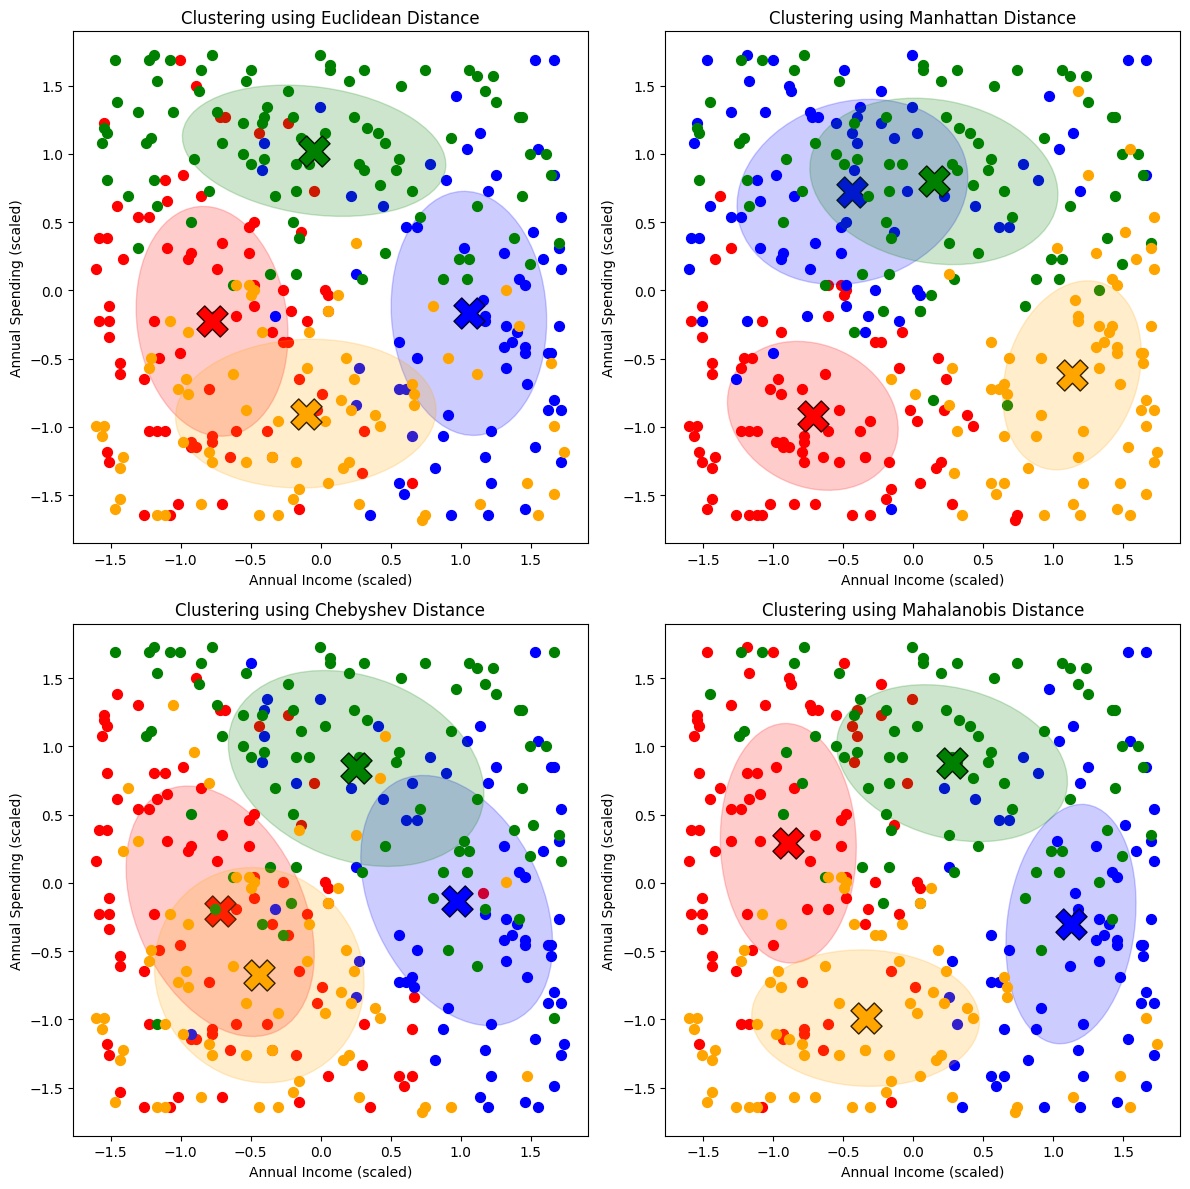


Metric: Euclidean
  Silhouette Score: 0.2015
  Davies-Bouldin Index: 1.4614
  Calinski-Harabasz Score: 70.7609

Metric: Manhattan
  Silhouette Score: 0.1942
  Davies-Bouldin Index: 1.4937
  Calinski-Harabasz Score: 68.5437

Metric: Chebyshev
  Silhouette Score: 0.1675
  Davies-Bouldin Index: 1.6095
  Calinski-Harabasz Score: 57.8662

Metric: Mahalanobis
  Silhouette Score: 0.2086
  Davies-Bouldin Index: 1.4247
  Calinski-Harabasz Score: 73.2444


In [27]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from matplotlib.patches import Ellipse

# 1. Simulate customer behavior data
np.random.seed(40)
n_customers = 300

# Random age between 18 and 70
age = np.random.randint(18, 70, size=n_customers)
# Random annual income between 15k and 150k
annual_income = np.random.randint(20, 200, size=n_customers)
# Random spending between 1k and 100k
annual_spending = np.random.randint(10, 100, size=n_customers)
# Random spending score between 1 and 100
spending_score = np.random.randint(10, 100, size=n_customers)

# Create a DataFrame to hold the customer data
data = pd.DataFrame({
    'Age': age,
    'Annual Income': annual_income,
    'Annual Spending': annual_spending,
    'Spending Score': spending_score
})

# Standardize the data for better clustering performance
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 2. Define distance metrics functions

# Euclidean distance


def euclidean_distance(X, centroids):
    return cdist(X, centroids, metric='euclidean')

# Manhattan distance


def manhattan_distance(X, centroids):
    return cdist(X, centroids, metric='cityblock')

# Chebyshev distance


def chebyshev_distance(X, centroids):
    return cdist(X, centroids, metric='chebyshev')

# Mahalanobis distance


def mahalanobis_distance(X, centroids):
    VI = np.linalg.inv(np.cov(X.T))  # Inverse of covariance matrix
    return cdist(X, centroids, metric='mahalanobis', VI=VI)

# 3. Custom KMeans clustering function


def custom_kmeans(X, n_clusters, distance_metric, max_iter=300):
    # Randomly initialize centroids
    np.random.seed(40)
    centroids = X[np.random.choice(range(len(X)), n_clusters, replace=False)]

    for _ in range(max_iter):
        # Compute distance from points to centroids
        distances = distance_metric(X, centroids)

        # Assign clusters based on minimum distance
        labels = np.argmin(distances, axis=1)

        # Calculate new centroids
        new_centroids = np.array([X[labels == i].mean(axis=0)
                                 for i in range(n_clusters)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# 4. Function to plot ellipses around clusters


def plot_ellipse(ax, cluster_points, color):
    cov = np.cov(cluster_points, rowvar=False)  # Covariance of the cluster
    mean = np.mean(cluster_points, axis=0)  # Mean of the cluster

    # Eigenvalues and eigenvectors of the covariance matrix
    eigvals, eigvecs = np.linalg.eigh(cov)

    # Calculate the angle of rotation for the ellipse
    angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))

    # Width and height of the ellipse are 2 times the square root of eigenvalues (standard deviations)
    width, height = 2 * np.sqrt(eigvals)

    # Create an ellipse patch
    ellipse = Ellipse(xy=mean, width=width, height=height,
                      angle=angle, color=color, alpha=0.2)
    ax.add_patch(ellipse)


# 5. Apply KMeans with different distance metrics
n_clusters = 4
metrics = {
    "Euclidean": euclidean_distance,
    "Manhattan": manhattan_distance,
    "Chebyshev": chebyshev_distance,
    "Mahalanobis": mahalanobis_distance
}

# Custom distinct colors for clusters
colors = ['red', 'blue', 'green', 'orange']

# Create plots for each distance metric
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for ax, (metric_name, metric_func) in zip(axes.flatten(), metrics.items()):
    labels, centroids = custom_kmeans(data_scaled, n_clusters, metric_func)

    # Scatter the clusters and centroids using the same color for each cluster and its centroid
    for i in range(n_clusters):
        cluster_points = data_scaled[labels == i]
        ax.scatter(cluster_points[:, 1], cluster_points[:, 2],
                   c=colors[i], s=50, label=f'Cluster {i}')
        ax.scatter(centroids[i, 1], centroids[i, 2], c=colors[i],
                   s=500, edgecolor='black', marker='X', label=f'Centroid {i}')

        # Draw ellipse around the cluster
        plot_ellipse(ax, cluster_points[:, [1, 2]], colors[i])

    ax.set_title(f'Clustering using {metric_name} Distance')
    ax.set_xlabel('Annual Income (scaled)')
    ax.set_ylabel('Annual Spending (scaled)')

plt.tight_layout()
plt.show()


# Function to evaluate clustering quality for each metric


def evaluate_clusters(X, labels):
    # Silhouette Score (higher is better)
    silhouette_avg = silhouette_score(X, labels)

    # Davies-Bouldin Index (lower is better)
    db_index = davies_bouldin_score(X, labels)

    # Calinski-Harabasz Index (higher is better)
    ch_score = calinski_harabasz_score(X, labels)

    return silhouette_avg, db_index, ch_score


# Apply KMeans with different distance metrics and evaluate each
cluster_quality = {}

for metric_name, metric_func in metrics.items():
    labels, centroids = custom_kmeans(data_scaled, n_clusters, metric_func)

    silhouette_avg, db_index, ch_score = evaluate_clusters(data_scaled, labels)

    cluster_quality[metric_name] = {
        "Silhouette Score": silhouette_avg,
        "Davies-Bouldin Index": db_index,
        "Calinski-Harabasz Score": ch_score
    }

# Display the results
for metric, scores in cluster_quality.items():
    print(f"\nMetric: {metric}")
    print(f"  Silhouette Score: {scores['Silhouette Score']:.4f}")
    print(f"  Davies-Bouldin Index: {scores['Davies-Bouldin Index']:.4f}")
    print(
        f"  Calinski-Harabasz Score: {scores['Calinski-Harabasz Score']:.4f}")